# Data Restructuring

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
source_dir = r'C:\Users\13472\Documents\Flatiron\Land cover\train'
target_dir = r'C:\Users\13472\Documents\Flatiron\Land cover\Data'

# Create target directories if they don't exist
for directory in ['train_images', 'train_masks']:
    os.makedirs(os.path.join(target_dir, directory, 'train'), exist_ok=True)
    
for directory in ['val_images', 'val_masks']:
    os.makedirs(os.path.join(target_dir, directory, 'val'), exist_ok=True)
    
# Split data into train and validation sets
images = [f for f in os.listdir(source_dir) if f.endswith('_sat.jpg')]
masks = [f for f in os.listdir(source_dir) if f.endswith('_mask.png')]

images_train, images_val, masks_train, masks_val = train_test_split(images, masks, test_size=0.2, random_state=42)

# Function to move files
def copy_files(file_list, source, target):
    for file in file_list:
        source_path = os.path.join(source, file)
        target_path = os.path.join(target, file)
        shutil.copy(source_path, target_path)

# Move train images and masks
copy_files(images_train, source_dir, os.path.join(target_dir, 'train_images', 'train'))
copy_files(masks_train, source_dir, os.path.join(target_dir, 'train_masks', 'train'))

# Move validation images and masks
copy_files(images_val, source_dir, os.path.join(target_dir, 'val_images', 'val'))
copy_files(masks_val, source_dir, os.path.join(target_dir, 'val_masks', 'val'))

print("Data restructuring completed.")


Data restructuring completed.


In [12]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [34]:
seed=24
batch_size= 8
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
img_data_gen_args = dict(rescale = 1/255.,
                         rotation_range=90,
                      width_shift_range=0.3,
                      height_shift_range=0.3,
                      shear_range=0.5,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='reflect')

mask_data_gen_args = dict(rescale = 1/255.,  #Original pixel values are 0 and 255. So rescaling to 0 to 1
                        rotation_range=90,
                      width_shift_range=0.3,
                      height_shift_range=0.3,
                      shear_range=0.5,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='reflect',
                      preprocessing_function = lambda x: np.where(x>0, 1, 0).astype(x.dtype)) #Binarize the output again. 


In [36]:
image_data_generator = ImageDataGenerator(**img_data_gen_args)
image_generator = image_data_generator.flow_from_directory("Data/train_images/", 
                                                           seed=seed, 
                                                           batch_size=batch_size,
                                                           class_mode='categorical')

mask_data_generator = ImageDataGenerator(**mask_data_gen_args)
mask_generator = mask_data_generator.flow_from_directory("Data/train_masks/", 
                                                         seed=seed, 
                                                         batch_size=batch_size,
                                                         color_mode = 'rgb',
                                                         class_mode='categorical'#Read masks in grayscale
                                                         )

valid_img_generator = image_data_generator.flow_from_directory("Data/val_images/", 
                                                               seed=seed, 
                                                               batch_size=batch_size, 
                                                               class_mode='categorical') #Default batch size 32, if not specified here
valid_mask_generator = mask_data_generator.flow_from_directory("Data/val_masks/", 
                                                               seed=seed, 
                                                               batch_size=batch_size, 
                                                               color_mode = 'rgb',   #Read masks in grayscale
                                                               class_mode='categorical')  #Default batch size 32, if not specified here

Found 642 images belonging to 1 classes.
Found 642 images belonging to 1 classes.
Found 161 images belonging to 1 classes.
Found 161 images belonging to 1 classes.


In [37]:
train_generator = zip(image_generator, mask_generator)
val_generator = zip(valid_img_generator, valid_mask_generator)

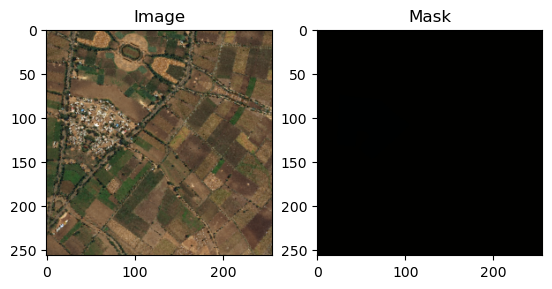

In [43]:
x = image_generator.next()
y = mask_generator.next()

image = x[0]
mask = y[0]
plt.subplot(1, 2, 1)  # Create a subplot for the image
plt.imshow(image[0])     # Display the image
plt.title('Image')    # Set the title for the subplot

# Display the mask
plt.subplot(1, 2, 2)  # Create a subplot for the mask
plt.imshow(mask[0])      # Display the mask
plt.title('Mask')     # Set the title for the subplot

plt.show()

In [46]:
!pwd

/c/Users/13472/Documents/Flatiron/Land cover


In [50]:
from unet_model_with_functions_of_blocks import build_unet

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)

ValueError: cannot reshape array of size 5992704 into shape (256,256)

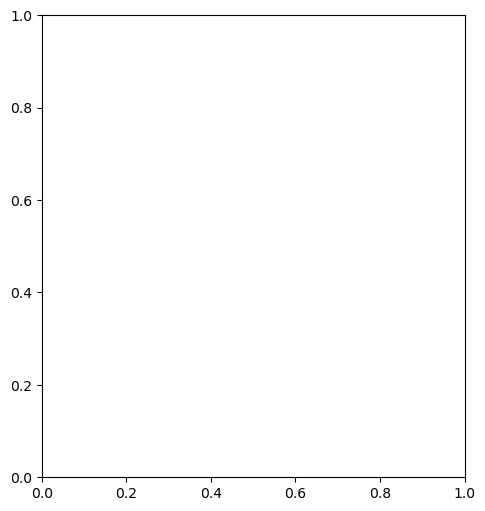

In [69]:
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()


Data restructuring completed.
